In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('medical.csv')
df

,Patient ID,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,50,6,148,72,35,0,33.6,0.627,1
1,2,31,1,85,66,29,0,26.6,0.351,0
2,3,32,8,183,64,0,0,23.3,0.672,1
3,4,21,1,89,66,23,94,28.1,0.167,0
4,5,33,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...,...,...
763,764,63,10,101,76,48,180,32.9,0.171,0
764,765,27,2,122,70,27,0,36.8,0.340,0
765,766,30,5,121,72,23,112,26.2,0.245,0
766,767,47,1,126,60,0,0,30.1,0.349,1


In [3]:
data=df.drop('Patient ID',axis=1)

In [4]:
#Replacing the 0's in these specified columns with the 'average'(because BMI,Bloodpressure,.... can't be zero)
no_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in no_zeroes:
    mean_value = data[column][data[column] != 0].mean() # calculates mean of all values of 'column' excluding all zeros
    data[column] = data[column].replace(0, mean_value) # replace 0's with mean
    
print(data)

     Age  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0     50            6    148.0           72.0       35.00000  155.548223   
1     31            1     85.0           66.0       29.00000  155.548223   
2     32            8    183.0           64.0       29.15342  155.548223   
3     21            1     89.0           66.0       23.00000   94.000000   
4     33            0    137.0           40.0       35.00000  168.000000   
..   ...          ...      ...            ...            ...         ...   
763   63           10    101.0           76.0       48.00000  180.000000   
764   27            2    122.0           70.0       27.00000  155.548223   
765   30            5    121.0           72.0       23.00000  112.000000   
766   47            1    126.0           60.0       29.15342  155.548223   
767   23            1     93.0           70.0       31.00000  155.548223   

      BMI  DiabetesPedigreeFunction  Outcome  
0    33.6                     0.627     

In [5]:
data.head()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,50,6,148.0,72.0,35.00000,155.548223,33.6,0.627,1
1,31,1,85.0,66.0,29.00000,155.548223,26.6,0.351,0
2,32,8,183.0,64.0,29.15342,155.548223,23.3,0.672,1
3,21,1,89.0,66.0,23.00000,94.000000,28.1,0.167,0
4,33,0,137.0,40.0,35.00000,168.000000,43.1,2.288,1


In [6]:
data.tail(10)

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
758,26,1,106.0,76.0,29.15342,155.548223,37.5,0.197,0
759,66,6,190.0,92.0,29.15342,155.548223,35.5,0.278,1
760,22,2,88.0,58.0,26.00000,16.000000,28.4,0.766,0
761,43,9,170.0,74.0,31.00000,155.548223,44.0,0.403,1
762,33,9,89.0,62.0,29.15342,155.548223,22.5,0.142,0
763,63,10,101.0,76.0,48.00000,180.000000,32.9,0.171,0
764,27,2,122.0,70.0,27.00000,155.548223,36.8,0.340,0
765,30,5,121.0,72.0,23.00000,112.000000,26.2,0.245,0
766,47,1,126.0,60.0,29.15342,155.548223,30.1,0.349,1
767,23,1,93.0,70.0,31.00000,155.548223,30.4,0.315,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

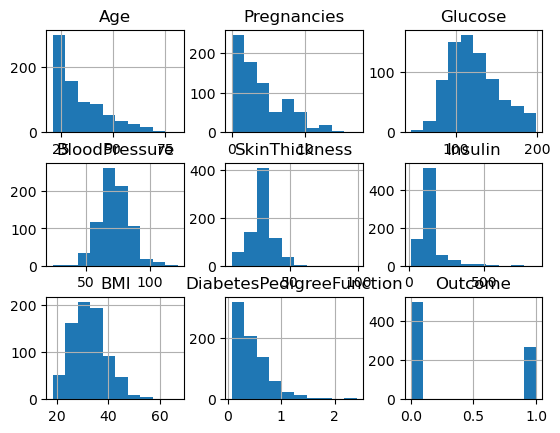

In [7]:
data.hist()

In [8]:
data.isnull().sum()


Age                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

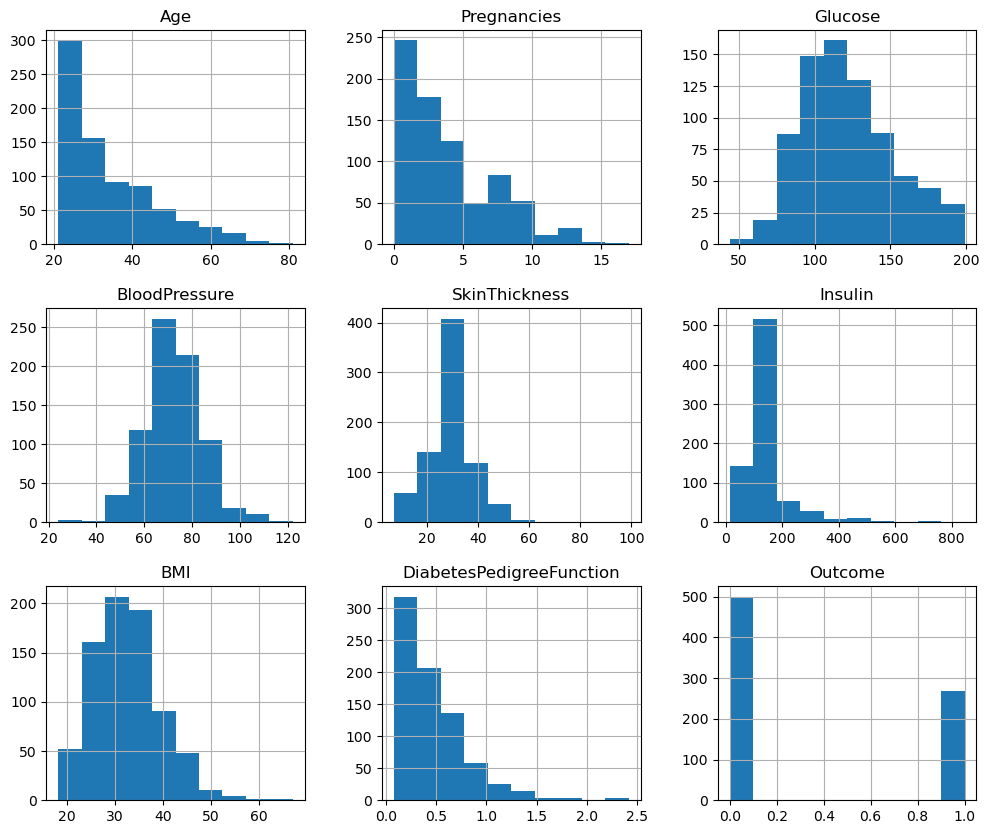

In [9]:
data.hist(figsize=(12,10))

In [10]:
data.shape

(768, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

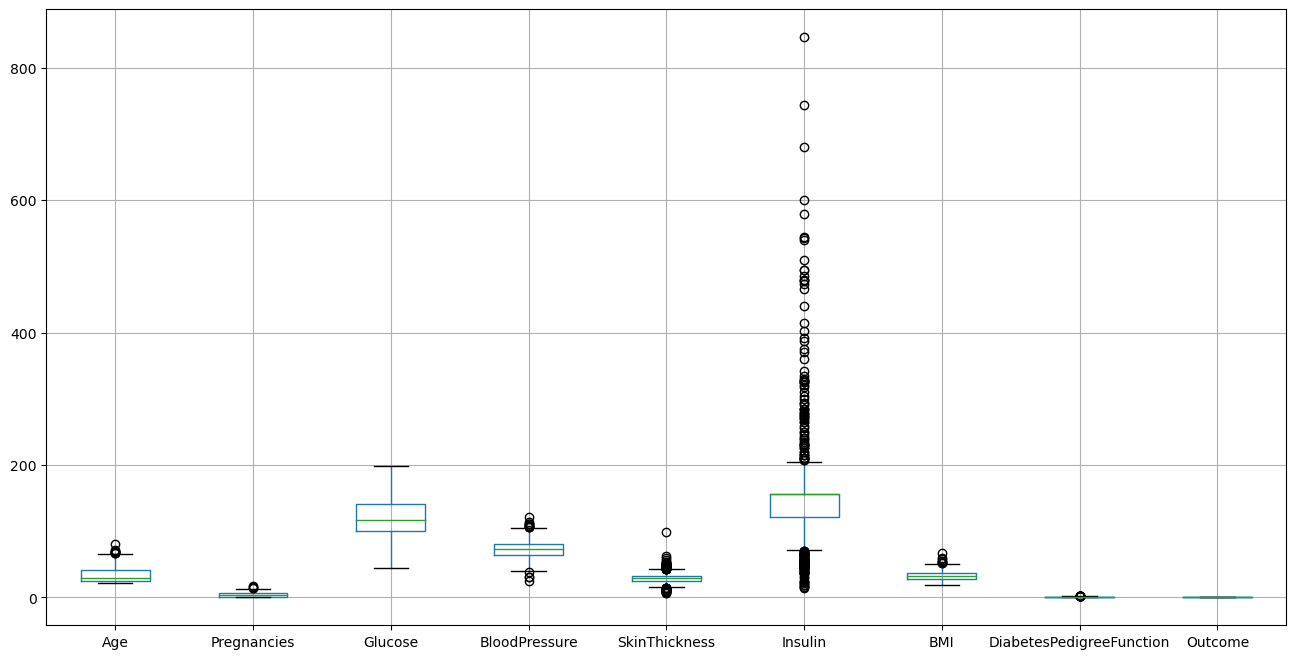

In [12]:
data.boxplot(figsize=(16,8))

In [13]:
data.corr()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,1.000000,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,0.238356
Pregnancies,0.544341,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.221898
Glucose,0.266534,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.492928
BloodPressure,0.324595,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.166074
SkinThickness,0.127872,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.215299
Insulin,0.136734,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.214411
BMI,0.025519,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.311924
DiabetesPedigreeFunction,0.033561,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.173844
Outcome,0.238356,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,1.000000


<Axes: >

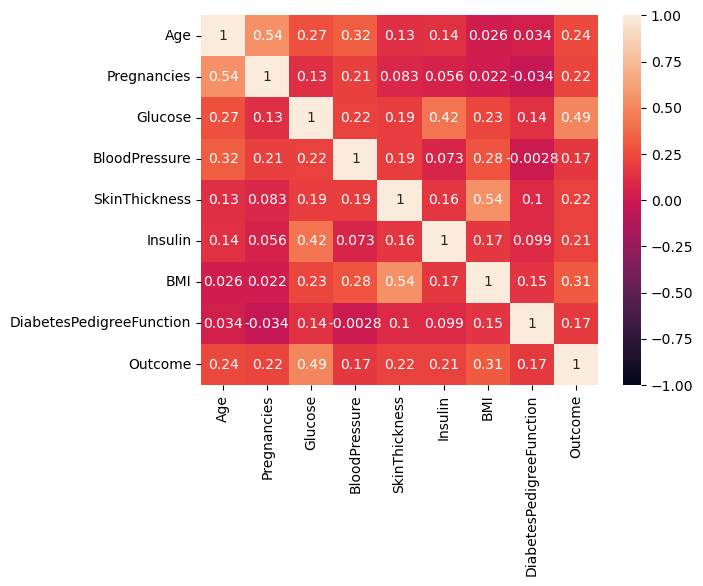

In [14]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

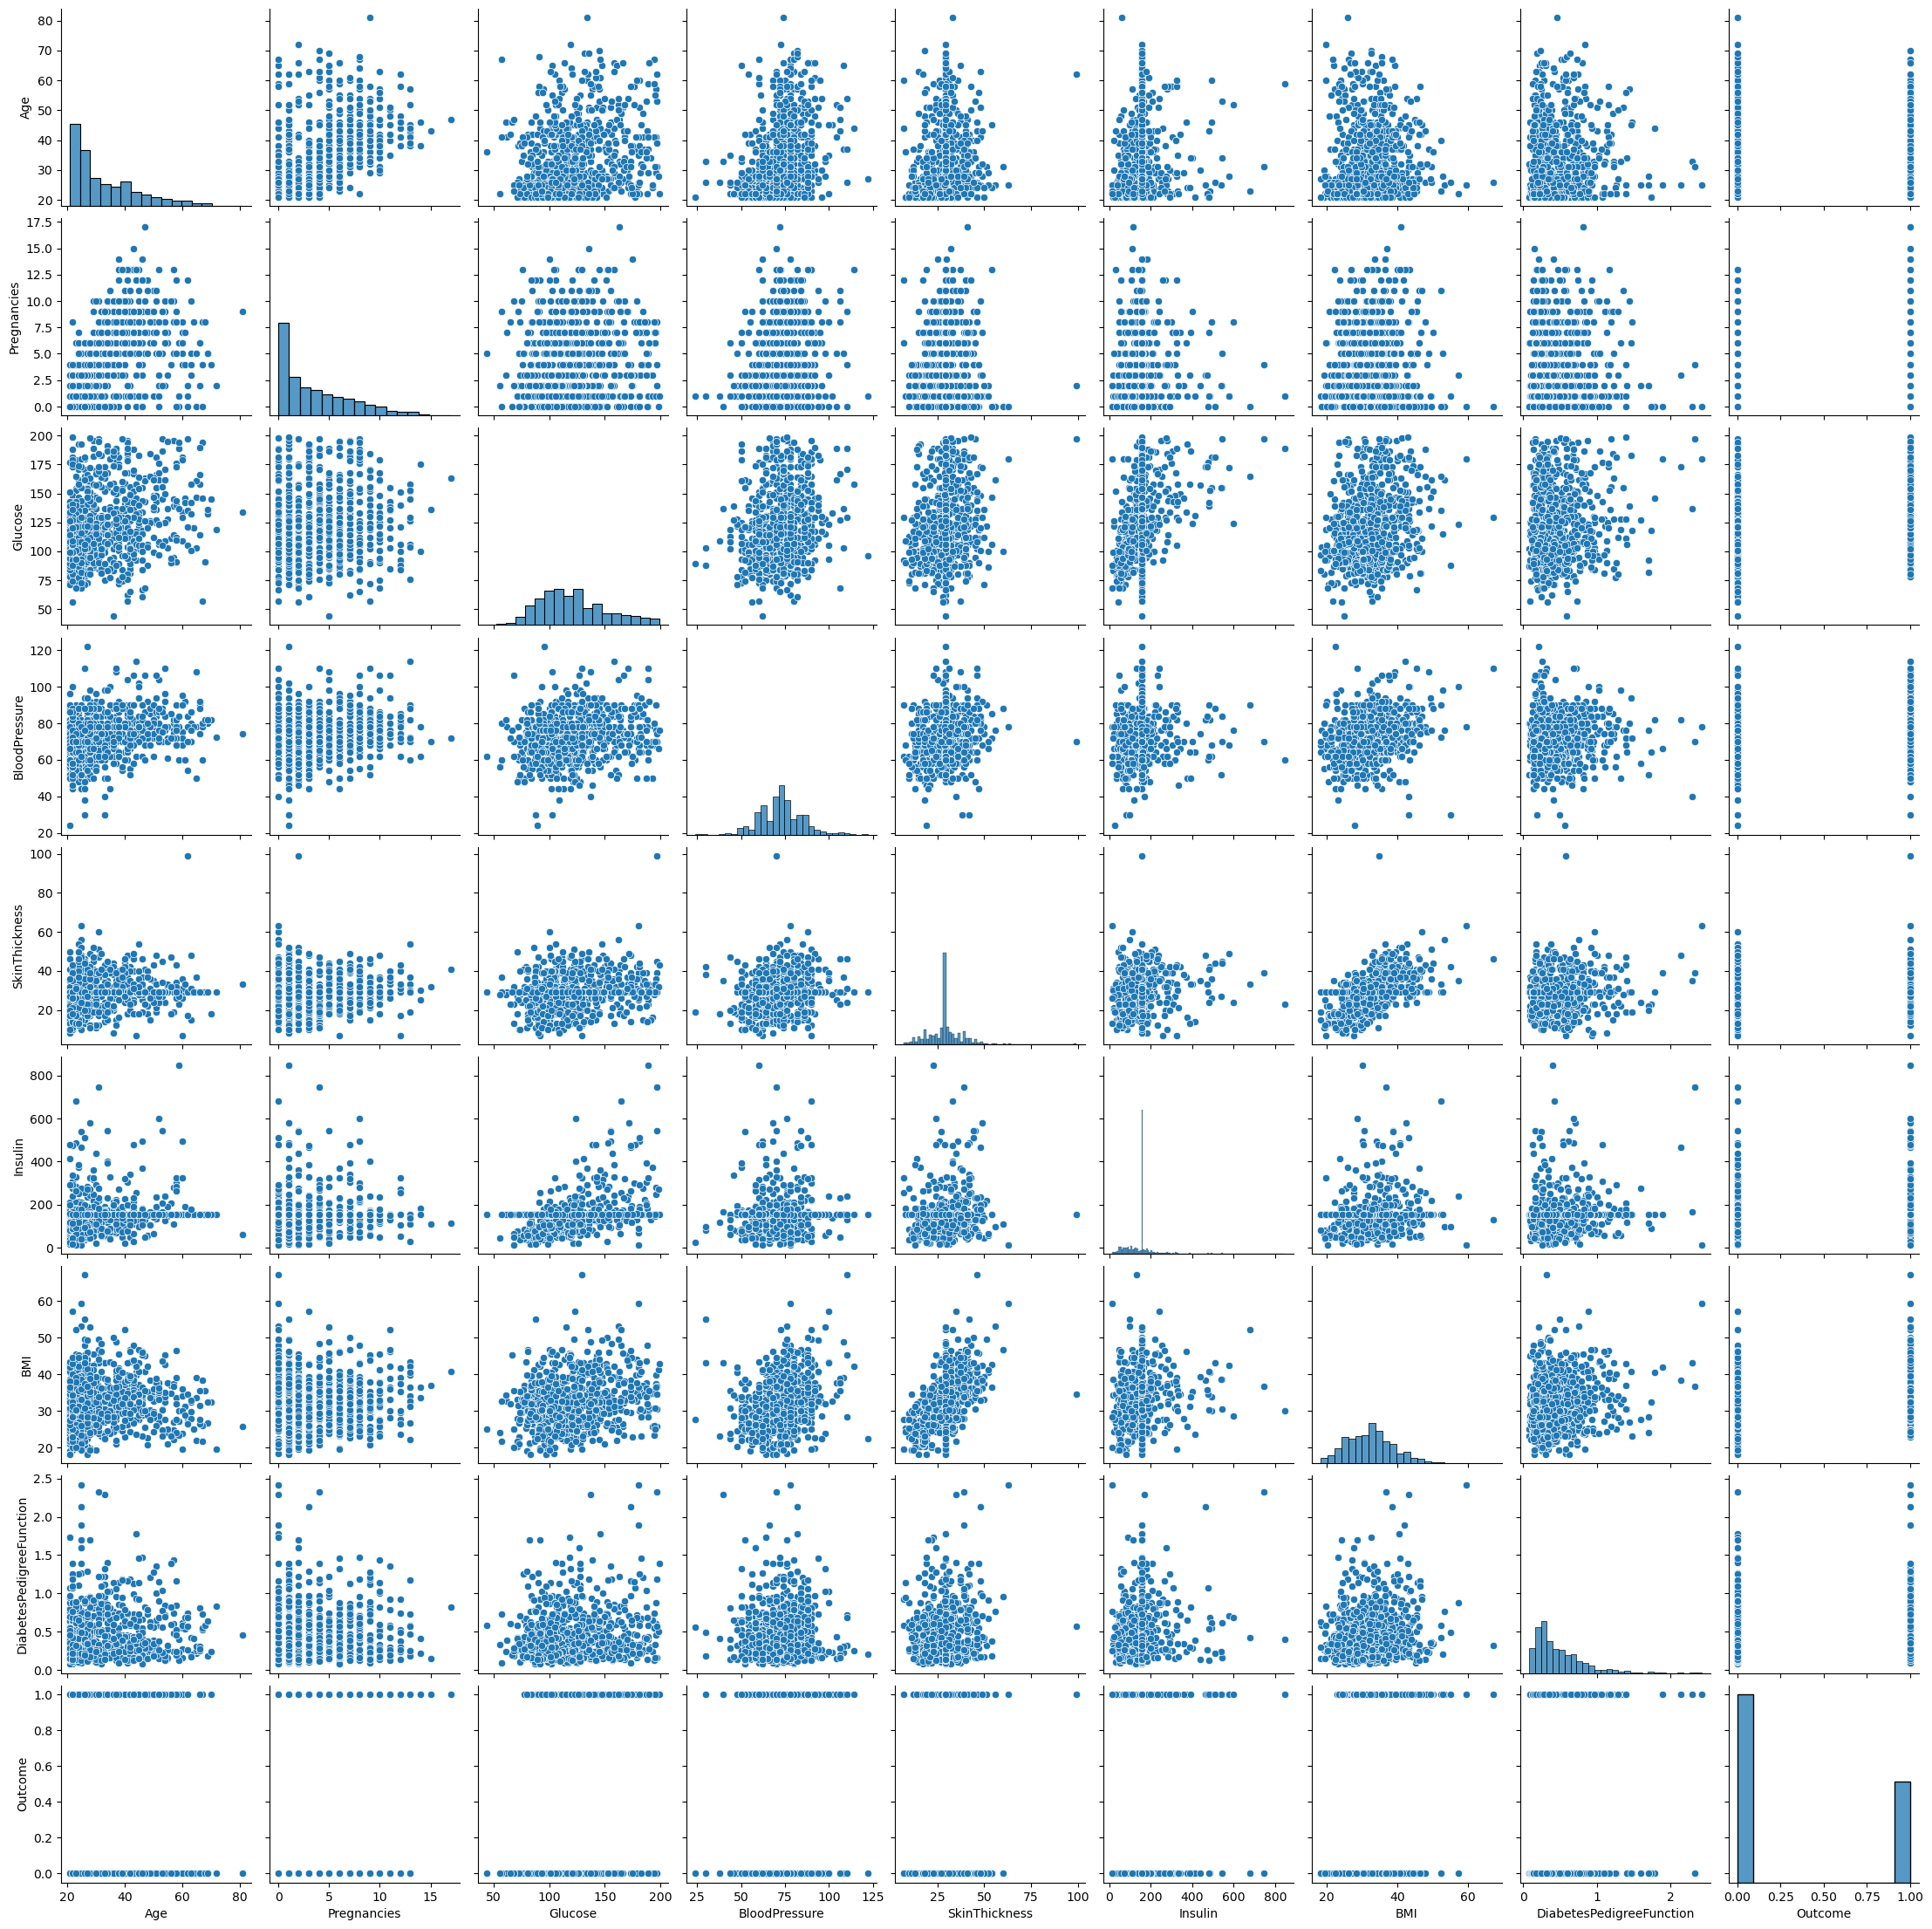

In [15]:
sns.pairplot(data)

In [16]:
data.columns

Index(['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [17]:
#splitting data
x=data.iloc[:,:-1]
x.head(3)

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,50,6,148.0,72.0,35.00000,155.548223,33.6,0.627
1,31,1,85.0,66.0,29.00000,155.548223,26.6,0.351
2,32,8,183.0,64.0,29.15342,155.548223,23.3,0.672


In [18]:
x.shape

(768, 8)

In [19]:
y=data.iloc[:,-1:]
y.head(3)

,Outcome
0,1
1,0
2,1


In [20]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (614, 8)

Training data-y-Shape:	 (614, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (154, 8)

Testing data(y-outcome)shape:	 (154, 1)


In [22]:
#1.) Build Linear Regression Model
print('**********Base Regression***********')
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train the data
print("Training Started.......\n")
print()
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_lin_reg=lin_reg.predict(xtest)
print('Predicted price\n',ypred_lin_reg)
print('\nTesting is also completed....\n')


print('********Performance metrics of Linear Regression model*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))

print('Accuracy Score-Linear regdression:\t',Accuracy_lin_reg)
print('Mean Squared Error ; \t',MSE_lin_reg)
print()
print('RMSE:\t',RMSE_lin_reg)
print()

**********Base Regression***********
Training Started.......


Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training completed.....

Testing invoked......

Predicted price
 [[ 5.98131271e-01]
 [ 8.51415608e-01]
 [ 4.21429760e-02]
 [ 4.40758163e-01]
 [ 3.80755488e-01]
 [ 2.55203214e-01]
 [ 4.01638042e-01]
 [-6.80042242e-02]
 [ 1.01060869e-01]
 [ 5.34952657e-01]
 [ 3.94902692e-01]
 [ 2.04663139e-01]
 [ 3.77227424e-01]
 [ 2.06627706e-01]
 [ 4.56340867e-01]
 [ 2.48762405e-01]
 [-3.59367807e-02]
 [ 3.51308636e-01]
 [ 2.68874957e-01]
 [ 1.06357517e+00]
 [ 1.90217953e-01]
 [ 3.66515837e-01]
 [ 4.06985433e-01]
 [ 4.19598361e-01]
 [ 8.02887030e-01]
 [ 3.68762667e-01]
 [ 1.49520345e-01]
 [ 5.91556841e-01]
 [ 5.52030178e-01]
 [ 3.12146551e-01]
 [ 1.19879775e-01]
 [ 1.19391423e-01]
 [ 3.95246143e-01]
 [ 2.98295338e-01]
 [ 5.21083656e-01]
 [ 1.50578200e-01]
 [ 3.52862412e-01]
 [ 8.78249179e-01]
 [ 1.73917697e-01]
 [ 6.83662322e-01]
 [ 1.00673203e-01]
 

In [32]:
#2.) Build KNN Regression
print('**********KNN Regression***********')
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
#train the data
print("Training Started.......\n")
print()
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_knn=knn_reg.predict(xtest)
print('Predicted price\n',ypred_knn)
print('\nTesting is also completed....\n')


print('********Performance metrics of KNN Regression model*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))

print('Accuracy Score-KNN regression:\t',Accuracy_knn_reg)
print('Mean Squared Error ; \t',MSE_knn)
print()
print('RMSE:\t',RMSE_knn)
print()

**********KNN Regression***********
Training Started.......


Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training completed.....

Testing invoked......

Predicted price
 [[1.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.66666667]
 [0.        ]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.33333333]
 [0.33333333]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.        ]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.333

In [41]:
# 3.)Build Decision Tree Regression Model

print('**********Decision Tree Regression***********')
from sklearn.tree import DecisionTreeRegressor


dt_reg=DecisionTreeRegressor()
#train the data
print("Training Started.......\n")
print()
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_dt_reg=dt_reg.predict(xtest)
print('Predicted price\n',ypred_dt_reg)
print('\nTesting is also completed....\n')


print('********Performance metrics of Decision Tree Regression model*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))

print('Accuracy Score-Decision Tree regression:\t',Accuracy_dt_reg)
print('Mean Squared Error ; \t',MSE_dt_reg)
print()
print('RMSE:\t',RMSE_dt_reg)
print()

**********Decision Tree Regression***********
Training Started.......


Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training completed.....

Testing invoked......

Predicted price
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]

Testing is also completed....

********Performance metrics of Decision Tree Regression model*****************

In [42]:
#4.)Build Support Vector Regression Model
print('**********Support Vector Regression***********')
from sklearn.svm import SVR


svr=SVR()
#train the data
print("Training Started.......\n")
print()
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_svr=svr.predict(xtest)
print('Predicted price\n',ypred_dt_reg)
print('\nTesting is also completed....\n')


print('********Performance metrics of SVR model*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))

print('Accuracy Score-SVR :\t',Accuracy_svr)
print()
print('Mean Squared Error ; \t',MSE_svr)
print()
print('RMSE:\t',RMSE_svr)
print()

**********Support Vector Regression***********
Training Started.......


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training completed.....

Testing invoked......

Predicted price
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]

Testing is also completed....

********Performance metrics of SVR model*****************
Accuracy Score-SVR :	 0.2897254779248173

Mean Squared Error ; 	 0.15732299141764777

RMSE:	 0.396639624114444

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Boosting
#1.)Using Adaboost with base model-Linear Regression
from sklearn.ensemble import AdaBoostRegressor


ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('AdaBoost Regression Model')
#train the data
print("Training Started.......\n")
print()
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_ada=ada.predict(xtest)
print('Predicted price\n',ypred_dt_reg)
print('\nTesting is also completed....\n')


print('********AdaBoost Regression-Performance metrics*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))

print('Accuracy Score-Adaboost Regression :\t',Accuracy_ada)
print()
print('Mean Squared Error ; \t',MSE_ada)
print()
print('RMSE:\t',RMSE_ada)
print()

AdaBoost Regression Model
Training Started.......


Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training completed.....

Testing invoked......

Predicted price
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]

Testing is also completed....

********AdaBoost Regression-Performance metrics*****************
Accuracy Score-Adaboo

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
#2.)Using GradientBoost
from sklearn.ensemble import GradientBoostingRegressor


grad_boost=GradientBoostingRegressor(n_estimators=15)
print('GradientBoosting Regression Model')
#train the data
print("Training Started.......\n")
print()
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_grad_boost=grad_boost.predict(xtest)
print('Predicted price\n',ypred_grad_boost)
print('\nTesting is also completed....\n')


print('********GradientBoosting Regression-Performance metrics*****************')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))

print('Accuracy Score-Gradientboosting Regression :\t',Accuracy_grad_boost)
print()
print('Mean Squared Error ; \t',MSE_grad_boost)
print()
print('RMSE:\t',RMSE_grad_boost)
print()


GradientBoosting Regression Model
Training Started.......


Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training completed.....

Testing invoked......

Predicted price
 [0.54546943 0.72743813 0.11994398 0.45921866 0.48106172 0.21866695
 0.40064409 0.11277291 0.13227091 0.51605443 0.50746502 0.30099483
 0.32215444 0.29194035 0.45958682 0.33745935 0.13227091 0.22891318
 0.20944236 0.74823839 0.16778643 0.43662636 0.37977094 0.42216734
 0.56219301 0.43662636 0.33658766 0.58764115 0.3103853  0.25212322
 0.17574273 0.30731244 0.22891318 0.2028854  0.44475509 0.119943

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#Models with Accuracy scores
Accuracy_dt_reg = r2_score(ytest, ypred_dt_reg)
scores=[('Linear Regression',Accuracy_lin_reg),
       ('KNN Regression',Accuracy_knn_reg),
       ('Decision Tree Regression',Accuracy_dt_reg),
       ('SVR',Accuracy_svr),
       ('Adaboost Regressor',Accuracy_ada),
       ('Gradient Boost Regressor',Accuracy_grad_boost)]

Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
0         Linear Regression        0.303547
4        Adaboost Regressor        0.291859
3                       SVR        0.289725
5  Gradient Boost Regressor        0.288630
1            KNN Regression        0.039068
2  Decision Tree Regression       -0.026080


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

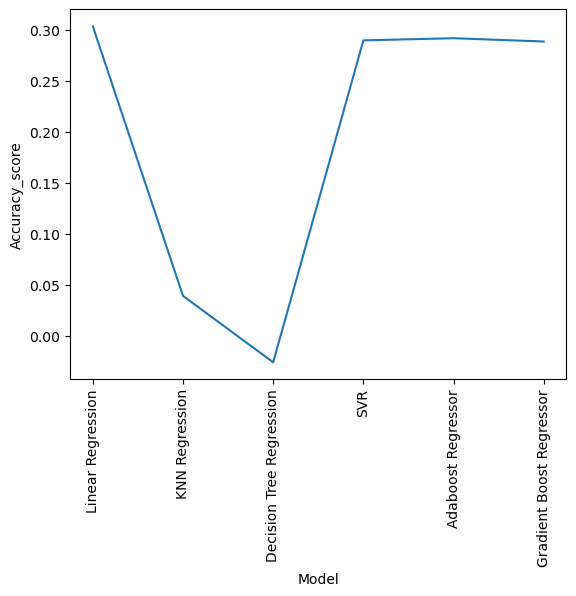

In [46]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)